In [5]:
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import sys

sys.path.append("../trimmingSession")
sys.path.append("~/.local/share/fonts")
from util import *
from stationUtil import *
from graph import *

In [6]:
import matplotlib.font_manager as fm

SHARE_PATH = "/usr/share/fonts"
font_name = fm.FontProperties(
    fname=f"{SHARE_PATH}/Pretendard/PretendardGOV-Medium.ttf"
).get_name()
plt.rc("font", family=font_name)

In [7]:
FLUX_IO_METRIC = pd.read_json("../database/FLUX_IO_METRIC.json")
FLUX_IO_METRIC.head()

,IN_FLUX,OUT_FLUX
95,1763884,1409566
96,1066540,1218638
97,1515137,1471895
98,975840,842384
99,1071272,983950


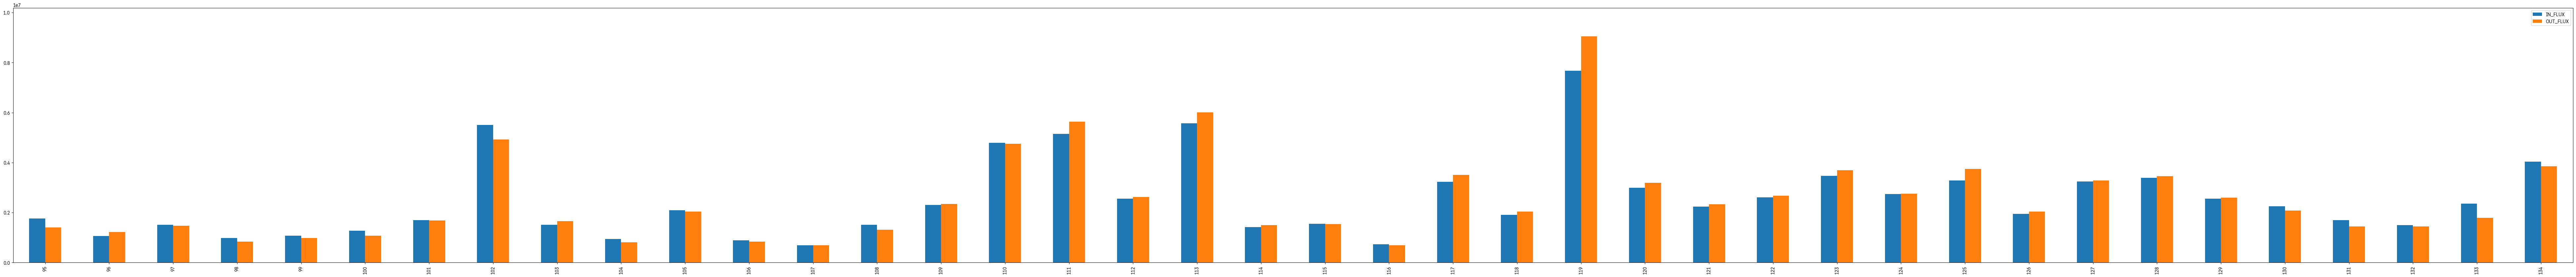

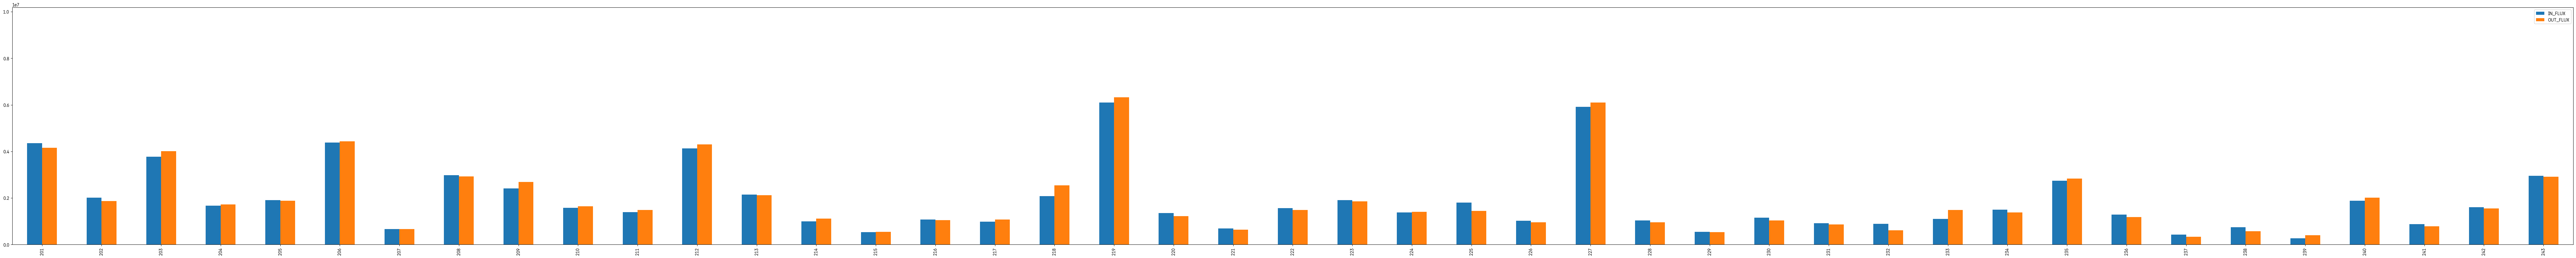

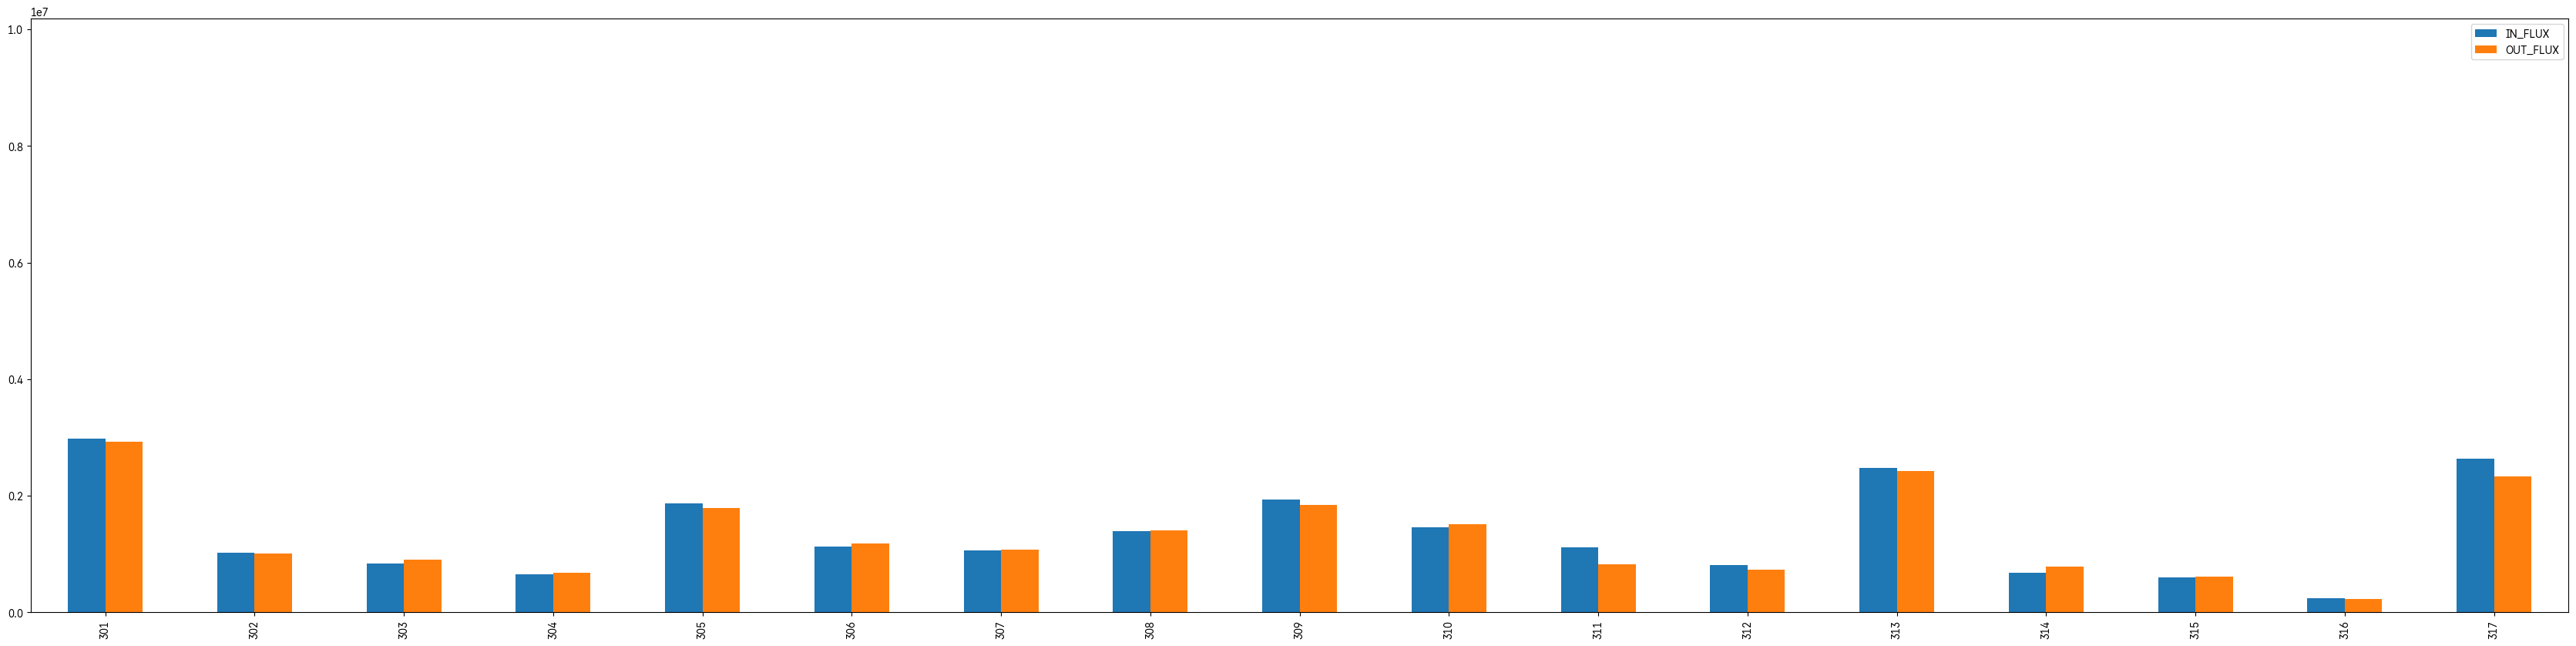

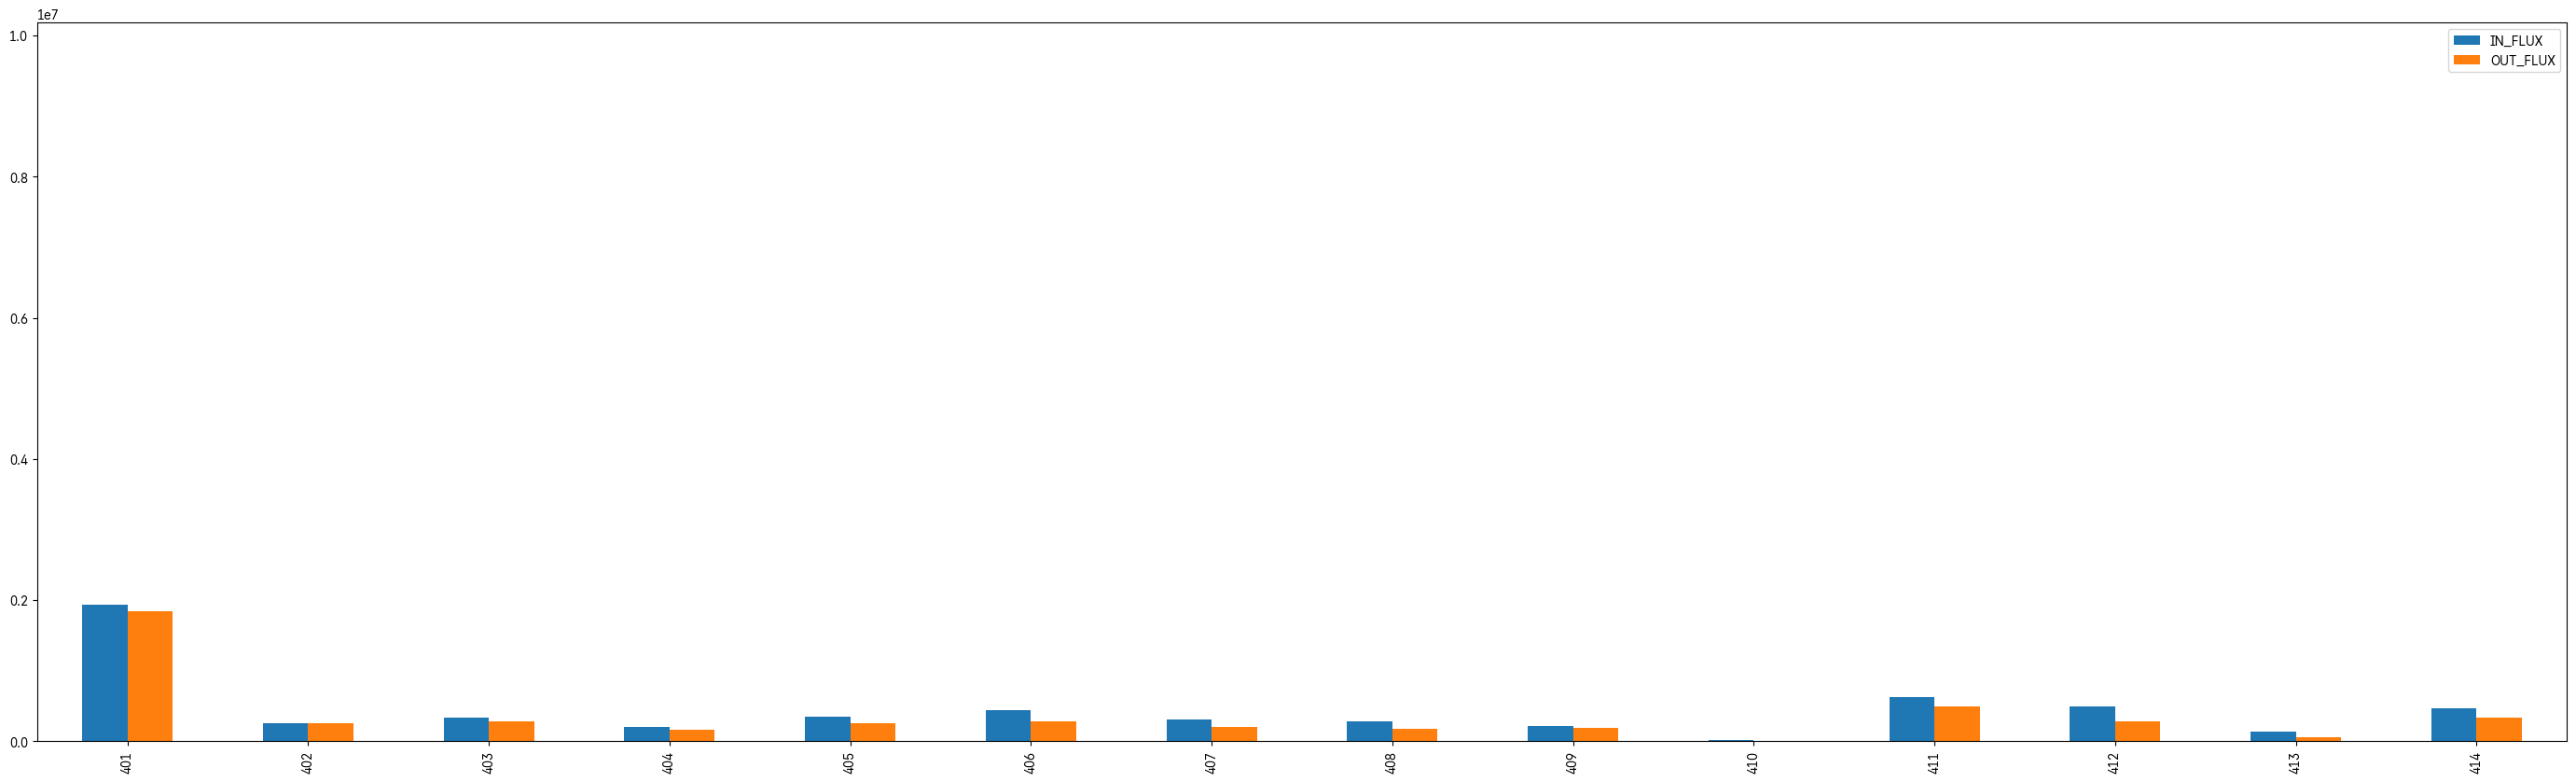

In [8]:
MAX_VALUE = max(FLUX_IO_METRIC.max().to_list()) * 1.125
for line in [1, 2, 3, 4]:
    l_range = line_num_to_range(line)
    plt.rcParams["figure.figsize"] = (len(l_range) * 2.5, 10)
    ax = FLUX_IO_METRIC.loc[l_range, :"OUT_FLUX"].plot.bar()
    fig = ax.get_figure()
    ax.set_ylim(0, MAX_VALUE)
    fig.savefig(f"line{line}_transfer_metric.svg", format="svg")